<a href="https://colab.research.google.com/github/preetikumari5/Machine-Learning/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#create a directory to store the unzipped files
!mkdir -p /content/BSDS500

In [2]:
#unzip the file
!unzip /content/archive.zip -d /content/BSDS500

Archive:  /content/archive.zip
  inflating: /content/BSDS500/ground_truth/test/100007.mat  
  inflating: /content/BSDS500/ground_truth/test/100039.mat  
  inflating: /content/BSDS500/ground_truth/test/100099.mat  
  inflating: /content/BSDS500/ground_truth/test/10081.mat  
  inflating: /content/BSDS500/ground_truth/test/101027.mat  
  inflating: /content/BSDS500/ground_truth/test/101084.mat  
  inflating: /content/BSDS500/ground_truth/test/102062.mat  
  inflating: /content/BSDS500/ground_truth/test/103006.mat  
  inflating: /content/BSDS500/ground_truth/test/103029.mat  
  inflating: /content/BSDS500/ground_truth/test/103078.mat  
  inflating: /content/BSDS500/ground_truth/test/104010.mat  
  inflating: /content/BSDS500/ground_truth/test/104055.mat  
  inflating: /content/BSDS500/ground_truth/test/105027.mat  
  inflating: /content/BSDS500/ground_truth/test/106005.mat  
  inflating: /content/BSDS500/ground_truth/test/106047.mat  
  inflating: /content/BSDS500/ground_truth/test/107014.

In [3]:
!ls /content/BSDS500/images/train

100075.jpg  134052.jpg	163062.jpg  196015.jpg	239096.jpg  292066.jpg	372047.jpg  65074.jpg
100080.jpg  135037.jpg	164074.jpg  198004.jpg	24004.jpg   293029.jpg	374020.jpg  65132.jpg
100098.jpg  135069.jpg	166081.jpg  198023.jpg	24063.jpg   299091.jpg	374067.jpg  66039.jpg
103041.jpg  138032.jpg	169012.jpg  198054.jpg	242078.jpg  301007.jpg	376001.jpg  66075.jpg
104022.jpg  138078.jpg	170054.jpg  20008.jpg	245051.jpg  302003.jpg	376020.jpg  67079.jpg
105019.jpg  140055.jpg	172032.jpg  202012.jpg	246016.jpg  309004.jpg	385028.jpg  68077.jpg
105053.jpg  140075.jpg	173036.jpg  207056.jpg	246053.jpg  310007.jpg	388016.jpg  71046.jpg
106020.jpg  144067.jpg	176019.jpg  209070.jpg	247085.jpg  311068.jpg	41004.jpg   76002.jpg
106025.jpg  145014.jpg	176035.jpg  2092.jpg	249061.jpg  311081.jpg	41025.jpg   78019.jpg
108041.jpg  145053.jpg	176039.jpg  216041.jpg	249087.jpg  314016.jpg	42044.jpg   80099.jpg
108073.jpg  147021.jpg	178054.jpg  216053.jpg	25098.jpg   317080.jpg	42078.jpg   8049.jpg
109

In [4]:
!ls /content/BSDS500/ground_truth/train

100075.mat  134008.mat	161062.mat  188091.mat	232038.mat  277095.mat	361084.mat  56028.mat
100080.mat  134052.mat	163014.mat  189003.mat	236017.mat  28075.mat	365025.mat  59078.mat
100098.mat  135037.mat	163062.mat  189011.mat	238011.mat  28096.mat	365073.mat  60079.mat
103041.mat  135069.mat	164074.mat  196015.mat	239007.mat  285036.mat	368016.mat  61060.mat
104022.mat  138032.mat	166081.mat  198004.mat	239096.mat  286092.mat	368078.mat  61086.mat
105019.mat  138078.mat	169012.mat  198023.mat	24004.mat   292066.mat	370036.mat  65010.mat
105053.mat  140055.mat	170054.mat  198054.mat	24063.mat   293029.mat	372047.mat  65019.mat
106020.mat  140075.mat	172032.mat  20008.mat	242078.mat  299091.mat	374020.mat  65074.mat
106025.mat  144067.mat	173036.mat  202012.mat	245051.mat  301007.mat	374067.mat  65132.mat
108041.mat  145014.mat	176019.mat  207056.mat	246016.mat  302003.mat	376001.mat  66039.mat
108073.mat  145053.mat	176035.mat  209070.mat	246053.mat  309004.mat	376020.mat  66075.mat
10

In [5]:
import os
import numpy as np
import cv2
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score

In [6]:
train_images_path = '/content/BSDS500/images/train'
train_labels_path = '/content/BSDS500/ground_truth/train'

In [7]:
!pip install scipy opencv-python

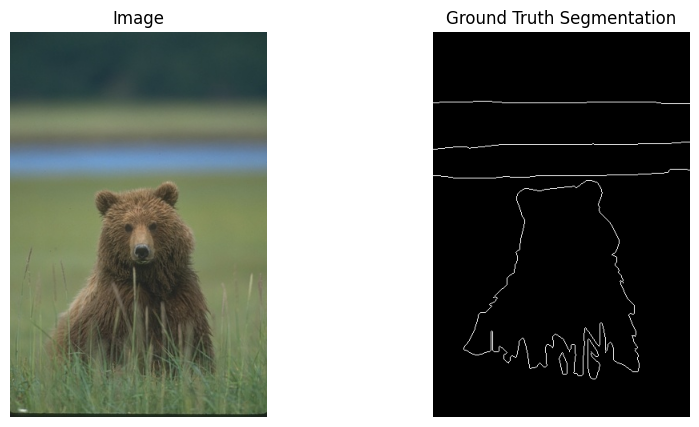

In [8]:
def load_image_and_annotation(image_path, annotation_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Load the ground truth annotations from .mat file
    annotation_data = scipy.io.loadmat(annotation_path)
    # Each annotation file may contain multiple segmentations
    # Here, we load the first segmentation
    segmentation = annotation_data['groundTruth'][0][0][0][0][1]
    return image, segmentation
# Load and display an image with its annotation
train_images_path = '/content/BSDS500/images/train/'
train_labels_path = '/content/BSDS500/ground_truth/train/'

sample_image_path = os.path.join(train_images_path, '100080.jpg')
sample_annotation_path = os.path.join(train_labels_path, '100080.mat')

image, segmentation = load_image_and_annotation(sample_image_path, sample_annotation_path)

# Display the image and its segmentation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmentation, cmap='gray')
plt.title('Ground Truth Segmentation')
plt.axis('off')
plt.show()

In [9]:
print("Image shape:", image.shape)
print("Segmentation shape:", segmentation.shape)

Image shape: (481, 321, 3)
Segmentation shape: (481, 321)


In [16]:
def preprocess_data(image, segmentation, target_size=(128, 128)):
    # Resize the image to the target size
    image_resized = cv2.resize(image, target_size)
    segmentation_resized = cv2.resize(segmentation, target_size,
                                      interpolation=cv2.INTER_NEAREST)

    # Normalize image to [0, 1] range
    image_resized = image_resized / 255.0

    # Ensure segmentation is in integer format
    segmentation_resized = np.uint8(segmentation_resized)

    return image_resized, segmentation_resized

In [11]:
image = np.array(image)
segmentation = np.array(segmentation)


In [12]:
image, segmentation = preprocess_data(image, segmentation)

# Print shapes after preprocessing
print("Resized Image shape:", image.shape)
print("Resized Segmentation shape:", segmentation.shape)

Resized Image shape: (128, 128, 3)
Resized Segmentation shape: (128, 128)


In [13]:
def unet_model(input_shape):
    inputs = layers.Input(input_shape)
    # Define U-Net architecture here (left out for brevity)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(inputs)
    model = models.Model(inputs, outputs)
    return model

# Compile and train the model
model = unet_model((128, 128, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Function to compute IoU
def compute_iou(prediction, ground_truth, num_classes=2):
    iou_list = []
    for cls in range(num_classes):
        intersection = np.logical_and(prediction == cls, ground_truth == cls).sum()
        union = np.logical_or(prediction == cls, ground_truth == cls).sum()
        if union == 0:
            iou_list.append(float('nan'))  # Handle the case where there's no union
        else:
            iou_list.append(intersection / union)
    return np.nanmean(iou_list)  # Average IoU across classes

# Function to compute Pixel Accuracy
def compute_pixel_accuracy(prediction, ground_truth):
    return np.mean(prediction == ground_truth)

# Function to compute F1 Score
def compute_f1_score(prediction, ground_truth):
    prediction_flat = prediction.flatten()
    ground_truth_flat = ground_truth.flatten()
    return f1_score(ground_truth_flat, prediction_flat, average='weighted')

test_images = [sample_image_path]  # List of test image paths
ground_truths = [segmentation]      # Corresponding ground truth segmentations

for img_path, gt in zip(test_images, ground_truths):
    # Load the image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Preprocess the image
    image_resized, gt_resized = preprocess_data(image, gt)

    # Add batch dimension if required
    #(e.g., if your model expects [batch_size, height, width, channels])
    image_input = np.expand_dims(image_resized, axis=0)  # Shape: (1, H, W, C)

    # Get model output
    model_output = model.predict(image_input)

    # Binarize model output based on threshold
    threshold = 0.5
    predicted_segmentation = (model_output > threshold).astype(np.uint8)

    # Compute evaluation metrics
    iou = compute_iou(predicted_segmentation, gt_resized, num_classes=2)
    pixel_accuracy = compute_pixel_accuracy(predicted_segmentation, gt_resized)
    f1 = compute_f1_score(predicted_segmentation, gt_resized)

    # Print the evaluation results
    print(f"Results for {img_path}:")
    print(f"IoU: {iou:.4f}")
    print(f"Pixel Accuracy: {pixel_accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Results for /content/BSDS500/images/train/100080.jpg:
IoU: 0.4937
Pixel Accuracy: 0.9874
F1 Score: 0.9812
